# Decision Trees


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


In [156]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

<div id="about_dataset">
    <h2>About the dataset</h2>
     Data is collected about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    The aim is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and a training part of the dataset 
    to build a decision tree, and then used to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    The data is downloaded and read directly into a dataframe from IBM Object Storage.
</div>


In [157]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, following variables are defined: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


The column containing the target name is removed since it doesn't contain numeric values.


In [158]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the **LabelEncoder() method**
to convert the categorical variable into dummy/indicator variables.


In [159]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder() #object creation to convert the categorical variable into dummy/indicator variables
le_sex.fit(['F','M']) #model creation
X[:,1] = le_sex.transform(X[:,1]) #model transformation


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


Unique values: [0 1]
Counts: [ 96 104]


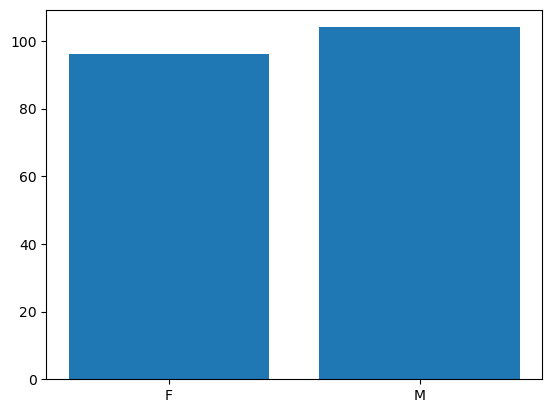

In [160]:
#with numpy array
group_names = ['F', 'M']
unique_values, counts = np.unique(X[:,1], return_counts=True)
plt.bar(group_names, counts)
print("Unique values:", unique_values)
print("Counts:", counts)

<BarContainer object of 3 artists>

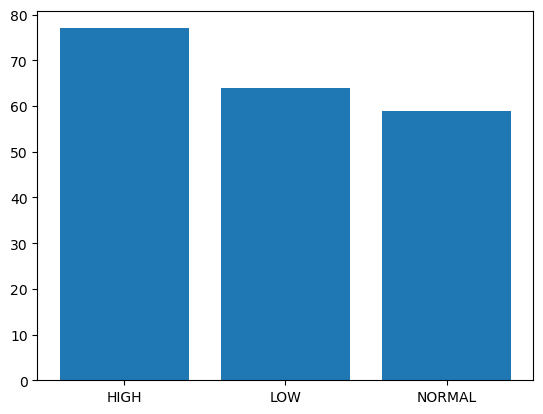

In [161]:
my_data["BP"].unique()
plt.bar(my_data["BP"].unique(), my_data["BP"].value_counts().values)

<BarContainer object of 2 artists>

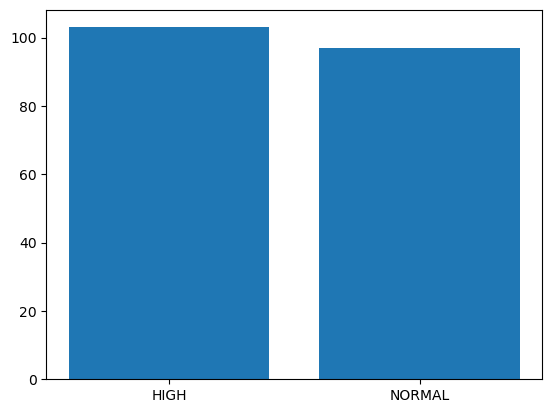

In [162]:
my_data["Cholesterol"].unique()
plt.bar(my_data["Cholesterol"].unique(), my_data["Cholesterol"].value_counts().values)

In [163]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<BarContainer object of 5 artists>

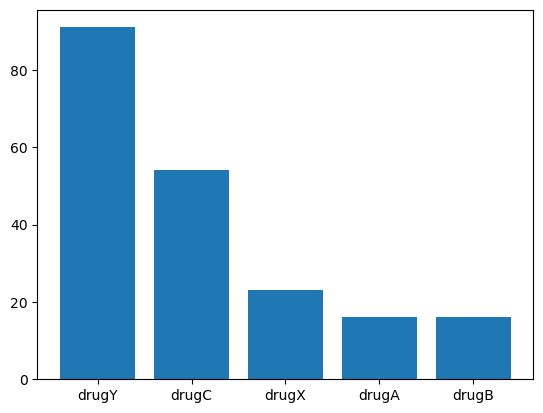

In [164]:
my_data["Drug"].unique()
plt.bar(my_data["Drug"].unique(), my_data["Drug"].value_counts().values)

<hr>

<div id="Train/Test Split">
    <h2><b>Train/Test Split</b></h2>
</div>


In [165]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>



In [166]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [167]:
X_trainset.shape

(140, 5)

In [168]:
y_trainset.shape

(140,)

<hr>

<div id="GRID SEARCH">
    <h2><b>MODEL DEVELOPMENT:GRID SEARCH</b></h2>
</div>


In [169]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10, None]}

# Create the base model
base_model = DecisionTreeClassifier()

# Initialize the grid search
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_trainset, y_trainset)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 3}


In [170]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [171]:
#Visualization
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
!dot -Tpng tree.dot -o tree.png

<hr>

<div id="MODEL EVALUATION">
    <h2><b>MODEL EVALUATION</b></h2>
</div>

In [172]:
predTree=drugTree.predict(X_testset)

In [173]:
confusion_matrix(y_testset, predTree)

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0, 10, 10,  1],
       [ 0,  0,  0,  0, 22]])

In [174]:
print(classification_report(y_testset, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       0.33      1.00      0.50         5
       drugX       1.00      0.48      0.65        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.82        60
   macro avg       0.86      0.90      0.82        60
weighted avg       0.93      0.82      0.83        60



In [175]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8166666666666667


<hr>

<div id="CROSS VALIDATION">
    <h2><b>CROSS VALIDATION</b></h2>
</div>


In [176]:
from sklearn.model_selection import KFold
#empty dictionary
dict_X_train = {}
dict_X_test = {}
dict_Y_train = {}
dict_Y_test = {}
# Initialize a list to store R-squared errors for each fold
r_squared_errors = []
kf = KFold(n_splits=4, shuffle=True, random_state=3)
# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    dict_X_train[fold] = X[train_index]
    dict_X_test[fold] = X[test_index]
    dict_Y_train[fold] = y[train_index]
    dict_Y_test[fold] = y[test_index]
    
    # Train the model
    drugTree_g = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
    drugTree_g.fit( dict_X_train[fold],dict_Y_train[fold])
    
    # Predict on the test set
    y_pred = drugTree_g.predict(dict_X_test[fold])
    
    # Evaluation
    r2 = metrics.accuracy_score(dict_Y_test[fold],y_pred)
    

    # Print fold information 
    print(f"Fold {fold}","Accuracy:", r2)

Fold 0 Accuracy: 0.8
Fold 1 Accuracy: 0.88
Fold 2 Accuracy: 0.92
Fold 3 Accuracy: 0.88


In [177]:
#best fold
cro_X_train = dict_X_train[2]
cro_X_test = dict_X_test[2]
cro_Y_train = dict_Y_train[2]
cro_Y_test = dict_Y_test[2]

In [178]:
#model object
drugTree_c = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
#training
drugTree_c.fit(cro_X_train,cro_Y_train)
#testing
pred_c=drugTree_c.predict(cro_X_test)

In [179]:
#evaluation
print(classification_report(cro_Y_test,pred_c))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         8
       drugC       0.00      0.00      0.00         4
       drugX       0.69      1.00      0.82         9
       drugY       1.00      1.00      1.00        23

    accuracy                           0.92        50
   macro avg       0.74      0.80      0.76        50
weighted avg       0.86      0.92      0.89        50

